In [1]:
from pathlib import Path
import numpy as np
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

In [2]:
# Code that should make matplotlib use ACM font (libertine)
import matplotlib

rc_fonts = {
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preamble': 
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """,
}
matplotlib.rcParams.update(rc_fonts)

In [3]:
dataset_path = Path("/home/felix/projects/colorful_configuration/datasets")

In [505]:
def plot_external_legend(original_ax, identifier, figsize=(9, 0.5), fontsize=16):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fig, legend_ax = plt.subplots(1, 1,figsize=figsize, sharey=True)
        #fig.set_facecolor("black")
        #fig.pad_inches(0)
        fig.set_tight_layout(True)
        #legend_ax.set_facecolor("black")
        #legend_ax.set_ymargin(-0.1)
        handles, labels = original_ax.get_legend_handles_labels()
        legend_ax.axis('off')
        print(legend_ax.margins())
        #legend_ax.margins(y=0)
        fig.legend(handles, labels, loc='center', mode="expand", ncol=6,  fontsize=fontsize)
        #legend_ax.set_autoscale(enable=True, tight=True)
        fig.savefig(Path(".")/Path('images')/f'legend_{fontsize}_{identifier}.pdf')

In [506]:
from brokenaxes import brokenaxes

In [546]:
def get_median_quantiles(list_values):
    list_medians = []
    list_stds0 = []
    list_stds1 = []

    for values in list_values:
        median = np.median(values)+1e-16
        quantiles = np.quantile(values, [0.5-0.68/2, 0.5+0.68/2,])
        #quantiles = np.quantile(values, [0.05, 0.95])
        list_medians.append(median)
        list_stds0.append(quantiles[0])
        list_stds1.append(quantiles[1])
    list_stds = [list_stds0[::-1], list_stds1[::-1]]
    return list_medians[::-1], list_stds

def quickplot(load_date, identifier, **kwargs):
    save_prefix = load_date.strftime("%Y_%m_%d__%H_%M_%S")
    if identifier!="HITS":

        with open("./results/"+f"_{identifier}_"+save_prefix+".pkl", "rb") as f:
            (list_values, datasets) = pickle.load(f)
        if datasets[0]=="karate":
            list_values=list_values[1:]
            datasets=datasets[1:]
        real_plot(list_values, datasets, identifier, **kwargs)
    else:
        with open("./results/"+f"_{identifier}_"+save_prefix+".pkl", "rb") as f:
            (list_values1, list_values2, datasets) = pickle.load(f)
        real_plot(list_values1, datasets, "hubs", **kwargs)
        real_plot(list_values2, datasets, "authority", **kwargs)

        
        
def reorder_list(l, order):
    assert len(l)==len(order)
    return [l[i] for i in order]

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors[2],colors[3] =colors[3],colors[2]

def real_plot(list_values, datasets, identifier, save_date=None, xlims=None,ylims=None,yticks=None,xticks=None, legend="None"):
    order = np.argsort(datasets)
    list_values=reorder_list(list_values, order)
    datasets = reorder_list(datasets, order)
    a=8
    plt.figure(figsize=(a,a/3))
    bax = brokenaxes(xlims=xlims, ylims = ylims, wspace=0.07, yscale="log", despine=False)
    markers = [".", "o", "<", "s", "*"]
    markers2 = ["^", "o", "+", "x", "v"]
    marker_sizes2 = 6*np.array([1.4, 1, 1.5, 1, 1.4,])
    


    for values, label, marker, ms, color in zip(list_values, datasets, markers2, marker_sizes2, colors):
        if identifier in ["hubs", "authority"]:
            if label in ["phonecalls", "AstroPh"]:
                continue
        means, stds = get_median_quantiles(values)
        bax.errorbar(x=np.arange(1,len(means)+1),y=means, yerr=stds, label=label, fmt=marker+"--", markersize=ms, color=color)

    print_identifier = {"pagerank": "PageRank",
                        "eigenvector" : "Eigenvector",
                        "katz" : "Katz",
                        "hubs" : "Hub Score",
                        "authority" : "Authority Score ",}[identifier]

    bax.set_ylabel(f"SAE of {print_identifier}", labelpad=50)
    bax.set_xlabel("depth $d$", labelpad=30)
    #plt.xticks([1,3,5,7,9])
    #if xlim is not None:
    #    plt.xlim(*xlim)
    bax.set_yscale("log")
    bax.axs[0].yaxis.set_major_locator(FixedLocator(yticks))
    #bax.axs[1].spines["right"].set_visible=True
    #bax.axs[1].spines["top"].set_visible=True
    if xticks is not None:
        for ax, ticks in zip(bax.axs, xticks):
            ax.set_xticks(ticks)
    
    if legend == "normal":
        plt.legend()
    #
    if save_date is None:
        plt.title("Convergence of Katz for synthetic networks ")
    else:
        time_str = save_date.strftime("%Y_%m_%d__%H_%M_%S")
        plt.savefig(Path(".")/Path('images')/f'{identifier}_{time_str}.pdf', bbox_inches = 'tight')
    if legend=="outer":
        plot_external_legend(bax.axs[0], identifier)

In [547]:
#quickplot(list_values, datasets, show_alpha=False, save_date=datetime.now())

In [548]:
from matplotlib.ticker import FixedLocator, ScalarFormatter

In [549]:
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [550]:
xlim = (-0.3+1,25.3)

(0.05, 0.05)


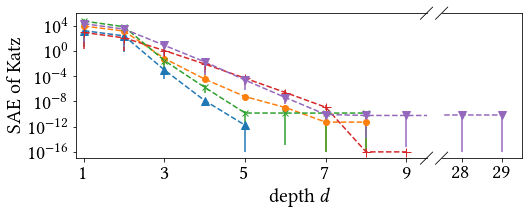

/home/felix/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


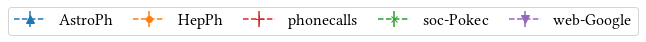

In [559]:
load_date = datetime(2022,1,6, 0,18,32)

xlims = ((0.8, 9.5), (27.5, 29.5))
yticks = [10**i for i in range(-16,5,4)]
ylims = [(1e-17, 1e6)]
xticks = [range(1,10,2), [28,29]]
quickplot(load_date, "katz" , save_date=load_date, xlims=xlims, ylims = ylims, yticks=yticks, xticks=xticks, legend="outer")

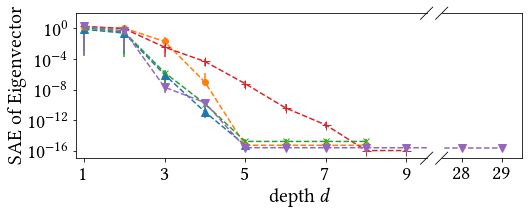

In [556]:
load_date = datetime(2022,1,7, 19,11,2)
xlims = [(0.8, 9.5), (27.5, 29.5)]
yticks = [10**i for i in range(-16,5,4)]
ylims = [(1e-17, 1e2)]
xticks = [range(1,10,2), [28,29]]
quickplot(load_date, "eigenvector" , save_date=load_date, xlims=xlims, ylims = ylims, yticks=yticks,xticks=xticks, )

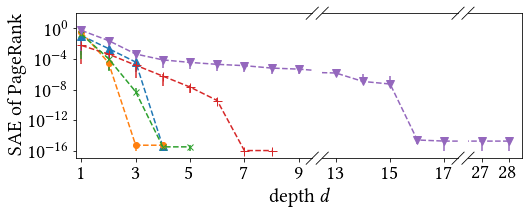

In [557]:

load_date = datetime(2022,1,13,14,50,38)
xlims = [(0.8, 9.5), (12.5, 17.5), (26.5, 28.5)]
yticks = [10**i for i in range(-16,5,4)]
ylims = [(1e-17, 1e2)]
xticks = [range(1,10,2), [13,15,17], [27,28]]
quickplot(load_date, "pagerank" , save_date=load_date, xlims=xlims, ylims = ylims, xticks=xticks,yticks=yticks,)

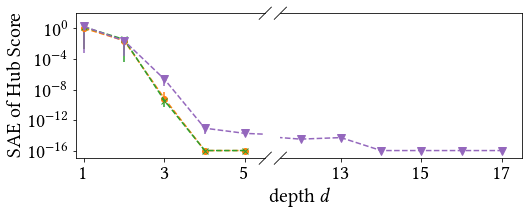

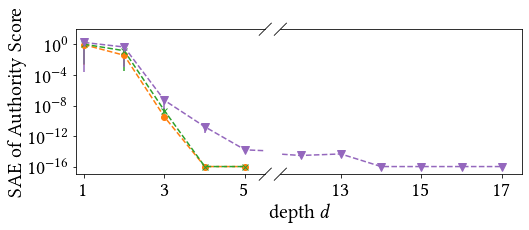

In [560]:

load_date = datetime(2022,2,3, 23,58,26)
xlims = [(0.8, 5.5), (11.5, 17.5)]
yticks = [10**i for i in range(-16,5,4)]
ylims = [(1e-17, 1e2)]
xticks = [range(1,6,2), range(13,18,2)]
quickplot(load_date, "HITS" , save_date=load_date, xlims=xlims, ylims = ylims, xticks=xticks,yticks=yticks,)